In [1]:
import os
import sys
import h5py
import argparse
import numpy as np
from collections import Counter
import xml.etree.ElementTree as et 

# Keras imports
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization, Activation

# ML4CVD Imports
from ml4cvd.plots import plot_ecg
from ml4cvd.arguments import parse_args
from ml4cvd.tensor_writer_ukbb import write_tensors
from ml4cvd.recipes import train_multimodal_multitask

# IPython imports
from IPython.display import Image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


In [10]:
def _to_float_or_false(s, sentinel=0):
    try:
        return float(s)
    except ValueError:
        return sentinel

stats = Counter()
xml_files = '/mnt/disks/ecg-rest-xml/'

ECG_TABLE_TAGS = ['RAmplitude'] #, 'SAmplitude']

for f in os.listdir(xml_files):
    if not f.endswith('.xml'):
        continue
    if '_20205_' not in f:
        continue
    root = et.parse(xml_files + f).getroot()
    for c in root.findall("./RestingECGMeasurements/MeasurementTable"):
        for cc in c:
            if cc.tag not in ECG_TABLE_TAGS:
                continue
            print(cc.tag, cc.attrib)
            print(list(map(_to_float_or_false, cc.text.strip().split(','))))
             
    
    for c in root.findall("./StripData/SampleRate"):
        stats['Sample Rate_' + c.text] += 1
    for c in root.findall("./StripData/Resolution"):
        stats['Resolution_' + c.text] += 1
    stats['count'] += 1
    if stats['count'] % 200 == 0:
        print(stats)
print(stats)

RAmplitude {'units': 'uV'}
[429.0, 478.0, 58.0, 63.0, 249.0, 268.0, 73.0, 141.0, 190.0, 693.0, 668.0, 537.0]
RAmplitude {'units': 'uV'}
[639.0, 849.0, 234.0, 112.0, 249.0, 541.0, 63.0, 122.0, 1030.0, 1914.0, 1611.0, 1152.0]
RAmplitude {'units': 'uV'}
[644.0, 1347.0, 722.0, 136.0, 151.0, 1035.0, 244.0, 1152.0, 571.0, 1723.0, 1801.0, 1616.0]
RAmplitude {'units': 'uV'}
[546.0, 922.0, 527.0, 24.0, 180.0, 712.0, 170.0, 312.0, 458.0, 1196.0, 1225.0, 1064.0]
RAmplitude {'units': 'uV'}
[400.0, 473.0, 166.0, 83.0, 166.0, 312.0, 29.0, 351.0, 581.0, 903.0, 732.0, 698.0]
RAmplitude {'units': 'uV'}
[590.0, 292.0, 63.0, 29.0, 566.0, 146.0, 53.0, 283.0, 966.0, 1147.0, 1059.0, 903.0]
RAmplitude {'units': 'uV'}
[576.0, 703.0, 68.0, 53.0, 278.0, 415.0, 0, 34.0, 449.0, 1005.0, 996.0, 908.0]
RAmplitude {'units': 'uV'}
[688.0, 566.0, 97.0, 48.0, 410.0, 224.0, 112.0, 786.0, 595.0, 1113.0, 1088.0, 771.0]
RAmplitude {'units': 'uV'}
[1044.0, 502.0, 68.0, 43.0, 800.0, 34.0, 156.0, 209.0, 146.0, 424.0, 571.0, 43

RAmplitude {'units': 'uV'}
[1308.0, 830.0, 195.0, 131.0, 908.0, 200.0, 346.0, 395.0, 410.0, 966.0, 1406.0, 1357.0]
RAmplitude {'units': 'uV'}
[561.0, 1020.0, 625.0, 39.0, 185.0, 820.0, 58.0, 141.0, 898.0, 1137.0, 1020.0, 961.0]
RAmplitude {'units': 'uV'}
[766.0, 571.0, 97.0, 19.0, 546.0, 229.0, 288.0, 434.0, 922.0, 1000.0, 991.0, 722.0]
RAmplitude {'units': 'uV'}
[737.0, 385.0, 53.0, 141.0, 556.0, 24.0, 39.0, 156.0, 341.0, 322.0, 629.0, 844.0]
RAmplitude {'units': 'uV'}
[634.0, 1596.0, 981.0, 0, 24.0, 1284.0, 112.0, 493.0, 1206.0, 2802.0, 2709.0, 1914.0]
RAmplitude {'units': 'uV'}
[605.0, 913.0, 307.0, 0, 170.0, 610.0, 180.0, 302.0, 1240.0, 1459.0, 1386.0, 1201.0]
RAmplitude {'units': 'uV'}
[888.0, 717.0, 53.0, 39.0, 673.0, 273.0, 141.0, 253.0, 566.0, 1674.0, 1879.0, 1547.0]
RAmplitude {'units': 'uV'}
[483.0, 864.0, 415.0, 19.0, 102.0, 625.0, 92.0, 170.0, 200.0, 815.0, 1748.0, 1958.0]
RAmplitude {'units': 'uV'}
[844.0, 703.0, 83.0, 0, 502.0, 288.0, 161.0, 327.0, 468.0, 756.0, 1318.0, 1

RAmplitude {'units': 'uV'}
[1113.0, 1220.0, 708.0, 48.0, 712.0, 927.0, 439.0, 1166.0, 1152.0, 1386.0, 1567.0, 1694.0]
RAmplitude {'units': 'uV'}
[869.0, 825.0, 122.0, 224.0, 566.0, 419.0, 0, 166.0, 761.0, 1206.0, 1293.0, 1123.0]
RAmplitude {'units': 'uV'}
[756.0, 620.0, 229.0, 53.0, 517.0, 283.0, 24.0, 58.0, 87.0, 136.0, 424.0, 620.0]
RAmplitude {'units': 'uV'}
[517.0, 1093.0, 600.0, 73.0, 117.0, 849.0, 200.0, 424.0, 307.0, 610.0, 2167.0, 2329.0]
RAmplitude {'units': 'uV'}
[766.0, 468.0, 63.0, 0, 541.0, 297.0, 273.0, 659.0, 800.0, 874.0, 1103.0, 1079.0]
RAmplitude {'units': 'uV'}
[805.0, 1113.0, 332.0, 43.0, 395.0, 717.0, 200.0, 268.0, 244.0, 1367.0, 1655.0, 1376.0]
RAmplitude {'units': 'uV'}
[332.0, 1040.0, 737.0, 34.0, 58.0, 888.0, 214.0, 664.0, 1044.0, 1401.0, 1528.0, 1137.0]
RAmplitude {'units': 'uV'}
[869.0, 908.0, 68.0, 0, 415.0, 488.0, 214.0, 371.0, 390.0, 1103.0, 1738.0, 1250.0]
RAmplitude {'units': 'uV'}
[595.0, 507.0, 48.0, 43.0, 390.0, 53.0, 375.0, 73.0, 161.0, 468.0, 825.0,

RAmplitude {'units': 'uV'}
[522.0, 747.0, 263.0, 117.0, 268.0, 502.0, 195.0, 156.0, 541.0, 1269.0, 966.0, 742.0]
RAmplitude {'units': 'uV'}
[668.0, 673.0, 146.0, 29.0, 561.0, 361.0, 83.0, 131.0, 219.0, 683.0, 878.0, 825.0]
RAmplitude {'units': 'uV'}
[444.0, 712.0, 488.0, 39.0, 126.0, 576.0, 107.0, 166.0, 229.0, 278.0, 571.0, 854.0]
RAmplitude {'units': 'uV'}
[473.0, 922.0, 449.0, 0, 83.0, 688.0, 0, 297.0, 957.0, 1538.0, 1557.0, 1313.0]
RAmplitude {'units': 'uV'}
[546.0, 683.0, 234.0, 131.0, 244.0, 434.0, 146.0, 517.0, 1425.0, 1503.0, 976.0, 742.0]
RAmplitude {'units': 'uV'}
[634.0, 649.0, 351.0, 126.0, 668.0, 478.0, 58.0, 43.0, 166.0, 2670.0, 2343.0, 1542.0]
RAmplitude {'units': 'uV'}
[1474.0, 1049.0, 219.0, 58.0, 952.0, 527.0, 195.0, 747.0, 976.0, 1455.0, 1391.0, 1132.0]
RAmplitude {'units': 'uV'}
[727.0, 53.0, 0, 0, 703.0, 0, 0, 97.0, 87.0, 39.0, 43.0, 73.0]
RAmplitude {'units': 'uV'}
[595.0, 664.0, 102.0, 39.0, 380.0, 380.0, 161.0, 175.0, 180.0, 473.0, 1245.0, 874.0]
RAmplitude {'un

RAmplitude {'units': 'uV'}
[952.0, 478.0, 122.0, 83.0, 781.0, 112.0, 185.0, 219.0, 693.0, 1093.0, 932.0, 722.0]
RAmplitude {'units': 'uV'}
[771.0, 664.0, 24.0, 0, 468.0, 375.0, 63.0, 537.0, 1171.0, 1484.0, 1376.0, 1040.0]
RAmplitude {'units': 'uV'}
[458.0, 991.0, 595.0, 43.0, 53.0, 761.0, 322.0, 541.0, 1108.0, 1308.0, 1083.0, 869.0]
RAmplitude {'units': 'uV'}
[888.0, 644.0, 161.0, 0, 644.0, 292.0, 258.0, 307.0, 371.0, 468.0, 556.0, 532.0]
RAmplitude {'units': 'uV'}
[874.0, 649.0, 170.0, 0, 581.0, 278.0, 107.0, 166.0, 1284.0, 1645.0, 1298.0, 1059.0]
RAmplitude {'units': 'uV'}
[434.0, 849.0, 444.0, 24.0, 63.0, 649.0, 29.0, 34.0, 131.0, 1259.0, 1528.0, 1201.0]
RAmplitude {'units': 'uV'}
[825.0, 1113.0, 385.0, 53.0, 356.0, 747.0, 122.0, 419.0, 498.0, 1049.0, 1406.0, 1313.0]
RAmplitude {'units': 'uV'}
[390.0, 249.0, 19.0, 283.0, 385.0, 63.0, 68.0, 102.0, 141.0, 258.0, 429.0, 478.0]
RAmplitude {'units': 'uV'}
[629.0, 1010.0, 29.0, 102.0, 200.0, 703.0, 571.0, 947.0, 913.0, 1269.0, 1616.0, 134

RAmplitude {'units': 'uV'}
[639.0, 341.0, 92.0, 180.0, 478.0, 73.0, 126.0, 161.0, 151.0, 200.0, 434.0, 668.0]
RAmplitude {'units': 'uV'}
[576.0, 571.0, 131.0, 29.0, 356.0, 410.0, 78.0, 126.0, 307.0, 1049.0, 903.0, 664.0]
RAmplitude {'units': 'uV'}
[717.0, 278.0, 73.0, 63.0, 664.0, 73.0, 112.0, 332.0, 605.0, 590.0, 468.0, 346.0]
RAmplitude {'units': 'uV'}
[1020.0, 981.0, 73.0, 0, 551.0, 517.0, 0, 0, 0, 356.0, 1186.0, 1176.0]
RAmplitude {'units': 'uV'}
[1230.0, 781.0, 180.0, 102.0, 922.0, 253.0, 527.0, 1152.0, 1323.0, 1313.0, 1289.0, 1171.0]
RAmplitude {'units': 'uV'}
[415.0, 1142.0, 727.0, 34.0, 34.0, 937.0, 336.0, 722.0, 1206.0, 1533.0, 1528.0, 1162.0]
RAmplitude {'units': 'uV'}
[844.0, 629.0, 83.0, 0, 537.0, 214.0, 126.0, 273.0, 668.0, 922.0, 1166.0, 942.0]
RAmplitude {'units': 'uV'}
[727.0, 971.0, 258.0, 43.0, 341.0, 610.0, 78.0, 166.0, 498.0, 1093.0, 1386.0, 1250.0]
RAmplitude {'units': 'uV'}
[522.0, 771.0, 288.0, 78.0, 205.0, 522.0, 375.0, 522.0, 483.0, 1284.0, 1757.0, 1479.0]
RAmp

RAmplitude {'units': 'uV'}
[1171.0, 400.0, 268.0, 151.0, 1108.0, 209.0, 180.0, 244.0, 449.0, 683.0, 1000.0, 1030.0]
RAmplitude {'units': 'uV'}
[512.0, 454.0, 0, 68.0, 317.0, 224.0, 63.0, 576.0, 385.0, 844.0, 942.0, 849.0]
RAmplitude {'units': 'uV'}
[1049.0, 576.0, 112.0, 97.0, 781.0, 87.0, 195.0, 659.0, 512.0, 708.0, 732.0, 708.0]
RAmplitude {'units': 'uV'}
[400.0, 581.0, 454.0, 29.0, 166.0, 458.0, 268.0, 581.0, 766.0, 659.0, 654.0, 517.0]
RAmplitude {'units': 'uV'}
[698.0, 1083.0, 410.0, 0, 312.0, 742.0, 29.0, 195.0, 424.0, 1508.0, 1850.0, 1694.0]
RAmplitude {'units': 'uV'}
[874.0, 649.0, 126.0, 0, 551.0, 214.0, 146.0, 170.0, 166.0, 869.0, 1020.0, 971.0]
RAmplitude {'units': 'uV'}
[292.0, 986.0, 849.0, 53.0, 48.0, 913.0, 131.0, 214.0, 1010.0, 1708.0, 1298.0, 854.0]
RAmplitude {'units': 'uV'}
[1040.0, 1220.0, 229.0, 83.0, 449.0, 717.0, 209.0, 581.0, 1347.0, 1601.0, 1499.0, 1308.0]
RAmplitude {'units': 'uV'}
[844.0, 1040.0, 229.0, 83.0, 375.0, 625.0, 180.0, 649.0, 922.0, 1411.0, 1049.0,

RAmplitude {'units': 'uV'}
[449.0, 1459.0, 1025.0, 43.0, 68.0, 1245.0, 151.0, 668.0, 1015.0, 2758.0, 2197.0, 1596.0]
RAmplitude {'units': 'uV'}
[1098.0, 1000.0, 219.0, 73.0, 629.0, 571.0, 97.0, 48.0, 615.0, 1005.0, 1293.0, 1298.0]
RAmplitude {'units': 'uV'}
[1567.0, 566.0, 166.0, 39.0, 1313.0, 141.0, 156.0, 961.0, 1352.0, 2895.0, 2929.0, 2524.0]
RAmplitude {'units': 'uV'}
[693.0, 1132.0, 478.0, 53.0, 229.0, 800.0, 493.0, 1025.0, 1162.0, 1621.0, 1616.0, 1396.0]
RAmplitude {'units': 'uV'}
[434.0, 605.0, 283.0, 48.0, 141.0, 434.0, 97.0, 151.0, 312.0, 834.0, 1523.0, 1821.0]
RAmplitude {'units': 'uV'}
[629.0, 600.0, 117.0, 117.0, 478.0, 288.0, 156.0, 371.0, 390.0, 332.0, 698.0, 786.0]
RAmplitude {'units': 'uV'}
[468.0, 1352.0, 893.0, 43.0, 68.0, 1123.0, 234.0, 395.0, 517.0, 678.0, 1523.0, 1499.0]
RAmplitude {'units': 'uV'}
[830.0, 786.0, 166.0, 29.0, 493.0, 395.0, 136.0, 268.0, 429.0, 800.0, 986.0, 1079.0]
RAmplitude {'units': 'uV'}
[844.0, 610.0, 107.0, 73.0, 727.0, 48.0, 156.0, 141.0, 170

RAmplitude {'units': 'uV'}
[478.0, 1181.0, 703.0, 0, 53.0, 942.0, 78.0, 351.0, 1240.0, 2822.0, 2846.0, 2304.0]
RAmplitude {'units': 'uV'}
[732.0, 893.0, 161.0, 53.0, 307.0, 527.0, 263.0, 327.0, 629.0, 903.0, 991.0, 903.0]
RAmplitude {'units': 'uV'}
[166.0, 58.0, 551.0, 214.0, 170.0, 307.0, 34.0, 1088.0, 1450.0, 1562.0, 1333.0, 1010.0]
RAmplitude {'units': 'uV'}
[395.0, 756.0, 361.0, 244.0, 39.0, 561.0, 185.0, 361.0, 644.0, 1489.0, 2299.0, 1669.0]
RAmplitude {'units': 'uV'}
[551.0, 996.0, 649.0, 24.0, 122.0, 791.0, 63.0, 170.0, 1572.0, 1787.0, 1635.0, 1264.0]
RAmplitude {'units': 'uV'}
[517.0, 585.0, 512.0, 0, 244.0, 483.0, 58.0, 126.0, 527.0, 1127.0, 1298.0, 976.0]
RAmplitude {'units': 'uV'}
[942.0, 288.0, 166.0, 43.0, 800.0, 126.0, 175.0, 292.0, 209.0, 249.0, 317.0, 356.0]
RAmplitude {'units': 'uV'}
[454.0, 693.0, 239.0, 43.0, 146.0, 468.0, 190.0, 327.0, 385.0, 942.0, 991.0, 932.0]
RAmplitude {'units': 'uV'}
[249.0, 722.0, 512.0, 175.0, 117.0, 620.0, 97.0, 371.0, 541.0, 1289.0, 1333.0

RAmplitude {'units': 'uV'}
[1000.0, 717.0, 0, 73.0, 698.0, 24.0, 522.0, 649.0, 1616.0, 1787.0, 1606.0, 1313.0]
RAmplitude {'units': 'uV'}
[1567.0, 761.0, 302.0, 0, 1333.0, 341.0, 34.0, 371.0, 649.0, 644.0, 590.0, 512.0]
RAmplitude {'units': 'uV'}
[800.0, 498.0, 63.0, 107.0, 551.0, 141.0, 43.0, 166.0, 170.0, 698.0, 2163.0, 3149.0]
RAmplitude {'units': 'uV'}
[1401.0, 444.0, 249.0, 0, 1274.0, 185.0, 136.0, 317.0, 434.0, 668.0, 971.0, 1118.0]
RAmplitude {'units': 'uV'}
[756.0, 1005.0, 502.0, 58.0, 639.0, 742.0, 268.0, 537.0, 1337.0, 761.0, 1557.0, 1699.0]
RAmplitude {'units': 'uV'}
[327.0, 556.0, 283.0, 43.0, 166.0, 415.0, 78.0, 195.0, 332.0, 615.0, 522.0, 454.0]
RAmplitude {'units': 'uV'}
[390.0, 581.0, 351.0, 73.0, 102.0, 419.0, 58.0, 83.0, 556.0, 1440.0, 1782.0, 1269.0]
RAmplitude {'units': 'uV'}
[351.0, 43.0, 869.0, 390.0, 346.0, 458.0, 53.0, 92.0, 366.0, 541.0, 742.0, 712.0]
RAmplitude {'units': 'uV'}
[1230.0, 1093.0, 83.0, 175.0, 693.0, 478.0, 429.0, 634.0, 1772.0, 2124.0, 2119.0, 16

RAmplitude {'units': 'uV'}
[1040.0, 249.0, 253.0, 29.0, 1064.0, 200.0, 253.0, 1591.0, 673.0, 1875.0, 1484.0, 908.0]
RAmplitude {'units': 'uV'}
[336.0, 346.0, 141.0, 0, 219.0, 219.0, 87.0, 229.0, 444.0, 1523.0, 1171.0, 678.0]
RAmplitude {'units': 'uV'}
[1254.0, 527.0, 68.0, 39.0, 1147.0, 131.0, 229.0, 473.0, 654.0, 1396.0, 1562.0, 1401.0]
RAmplitude {'units': 'uV'}
[107.0, 87.0, 0, 24.0, 205.0, 58.0, 0, 0, 87.0, 1440.0, 1289.0, 537.0]
RAmplitude {'units': 'uV'}
[561.0, 581.0, 209.0, 53.0, 664.0, 332.0, 229.0, 224.0, 302.0, 405.0, 1103.0, 957.0]
RAmplitude {'units': 'uV'}
[717.0, 97.0, 78.0, 68.0, 874.0, 48.0, 307.0, 698.0, 507.0, 644.0, 551.0, 356.0]
RAmplitude {'units': 'uV'}
[1225.0, 541.0, 92.0, 24.0, 1054.0, 156.0, 131.0, 410.0, 288.0, 761.0, 2021.0, 2031.0]
RAmplitude {'units': 'uV'}
[971.0, 1064.0, 73.0, 63.0, 449.0, 585.0, 156.0, 224.0, 483.0, 1386.0, 1889.0, 1831.0]
RAmplitude {'units': 'uV'}
[776.0, 395.0, 0, 53.0, 581.0, 87.0, 102.0, 126.0, 205.0, 195.0, 317.0, 419.0]
RAmplitu

RAmplitude {'units': 'uV'}
[800.0, 507.0, 58.0, 53.0, 546.0, 117.0, 117.0, 249.0, 1118.0, 1489.0, 1528.0, 1020.0]
RAmplitude {'units': 'uV'}
[1069.0, 957.0, 117.0, 78.0, 639.0, 424.0, 263.0, 410.0, 644.0, 883.0, 1206.0, 1293.0]
RAmplitude {'units': 'uV'}
[678.0, 468.0, 92.0, 39.0, 444.0, 136.0, 112.0, 209.0, 356.0, 507.0, 673.0, 615.0]
RAmplitude {'units': 'uV'}
[1342.0, 932.0, 34.0, 87.0, 898.0, 336.0, 200.0, 761.0, 1401.0, 1660.0, 1870.0, 1557.0]
RAmplitude {'units': 'uV'}
[664.0, 805.0, 161.0, 29.0, 380.0, 483.0, 302.0, 668.0, 908.0, 1303.0, 1567.0, 1567.0]
RAmplitude {'units': 'uV'}
[1206.0, 732.0, 185.0, 68.0, 839.0, 258.0, 180.0, 708.0, 458.0, 2163.0, 1689.0, 1113.0]
RAmplitude {'units': 'uV'}
[693.0, 864.0, 43.0, 63.0, 263.0, 517.0, 234.0, 595.0, 1098.0, 1420.0, 1391.0, 1054.0]
RAmplitude {'units': 'uV'}
[825.0, 800.0, 156.0, 0, 24.0, 434.0, 229.0, 283.0, 244.0, 161.0, 385.0, 1201.0]
RAmplitude {'units': 'uV'}
[1386.0, 1362.0, 258.0, 48.0, 927.0, 771.0, 200.0, 664.0, 302.0, 1289

RAmplitude {'units': 'uV'}
[468.0, 1083.0, 834.0, 122.0, 156.0, 952.0, 112.0, 214.0, 351.0, 502.0, 1699.0, 1684.0]
RAmplitude {'units': 'uV'}
[717.0, 380.0, 180.0, 24.0, 620.0, 214.0, 205.0, 581.0, 703.0, 815.0, 717.0, 717.0]
RAmplitude {'units': 'uV'}
[58.0, 68.0, 170.0, 185.0, 24.0, 58.0, 263.0, 351.0, 385.0, 571.0, 537.0, 405.0]
RAmplitude {'units': 'uV'}
[595.0, 1396.0, 805.0, 29.0, 24.0, 1103.0, 58.0, 58.0, 107.0, 1743.0, 2177.0, 1689.0]
RAmplitude {'units': 'uV'}
[898.0, 473.0, 136.0, 0, 761.0, 136.0, 0, 58.0, 297.0, 1010.0, 1557.0, 1699.0]
RAmplitude {'units': 'uV'}
[786.0, 551.0, 53.0, 234.0, 576.0, 273.0, 190.0, 498.0, 507.0, 805.0, 893.0, 781.0]
RAmplitude {'units': 'uV'}
[1064.0, 961.0, 151.0, 29.0, 678.0, 439.0, 478.0, 766.0, 698.0, 922.0, 1030.0, 1025.0]
RAmplitude {'units': 'uV'}
[483.0, 1567.0, 1376.0, 97.0, 112.0, 1464.0, 195.0, 371.0, 952.0, 1518.0, 1625.0, 1279.0]
RAmplitude {'units': 'uV'}
[24.0, 107.0, 107.0, 263.0, 288.0, 107.0, 126.0, 375.0, 302.0, 600.0, 776.0, 7

RAmplitude {'units': 'uV'}
[957.0, 483.0, 205.0, 0, 844.0, 200.0, 78.0, 1342.0, 1455.0, 1621.0, 1367.0, 1274.0]
RAmplitude {'units': 'uV'}
[888.0, 703.0, 263.0, 117.0, 615.0, 297.0, 87.0, 317.0, 283.0, 249.0, 581.0, 1005.0]
RAmplitude {'units': 'uV'}
[1362.0, 527.0, 83.0, 53.0, 1098.0, 53.0, 336.0, 556.0, 463.0, 644.0, 1093.0, 1064.0]
RAmplitude {'units': 'uV'}
[1166.0, 937.0, 92.0, 102.0, 717.0, 375.0, 268.0, 356.0, 527.0, 776.0, 927.0, 1020.0]
RAmplitude {'units': 'uV'}
[253.0, 981.0, 800.0, 19.0, 87.0, 893.0, 249.0, 566.0, 708.0, 712.0, 1572.0, 1367.0]
RAmplitude {'units': 'uV'}
[410.0, 791.0, 458.0, 19.0, 78.0, 625.0, 48.0, 48.0, 200.0, 292.0, 1259.0, 1523.0]
RAmplitude {'units': 'uV'}
[683.0, 258.0, 224.0, 195.0, 722.0, 214.0, 209.0, 1132.0, 1386.0, 1250.0, 1137.0, 585.0]
RAmplitude {'units': 'uV'}
[605.0, 1098.0, 556.0, 0, 219.0, 830.0, 249.0, 361.0, 898.0, 1240.0, 1206.0, 1044.0]
RAmplitude {'units': 'uV'}
[444.0, 1059.0, 737.0, 19.0, 112.0, 898.0, 112.0, 219.0, 698.0, 1123.0, 1

RAmplitude {'units': 'uV'}
[541.0, 898.0, 483.0, 34.0, 185.0, 673.0, 107.0, 253.0, 405.0, 1030.0, 1240.0, 1040.0]
RAmplitude {'units': 'uV'}
[971.0, 1259.0, 444.0, 0, 385.0, 834.0, 73.0, 175.0, 263.0, 756.0, 2026.0, 1997.0]
RAmplitude {'units': 'uV'}
[629.0, 390.0, 78.0, 244.0, 449.0, 136.0, 200.0, 825.0, 1098.0, 1293.0, 1352.0, 1044.0]
RAmplitude {'units': 'uV'}
[703.0, 971.0, 273.0, 48.0, 307.0, 625.0, 170.0, 585.0, 1279.0, 1943.0, 2016.0, 1552.0]
RAmplitude {'units': 'uV'}
[341.0, 712.0, 527.0, 83.0, 87.0, 590.0, 126.0, 292.0, 883.0, 1054.0, 986.0, 747.0]
RAmplitude {'units': 'uV'}
[317.0, 1303.0, 991.0, 0, 0, 1147.0, 0, 0, 278.0, 1191.0, 1660.0, 73.0]
RAmplitude {'units': 'uV'}
[668.0, 43.0, 131.0, 58.0, 654.0, 73.0, 63.0, 239.0, 966.0, 1616.0, 1518.0, 1166.0]
RAmplitude {'units': 'uV'}
[590.0, 92.0, 146.0, 278.0, 581.0, 122.0, 151.0, 156.0, 195.0, 366.0, 1416.0, 1035.0]
RAmplitude {'units': 'uV'}
[781.0, 712.0, 58.0, 58.0, 483.0, 371.0, 166.0, 341.0, 517.0, 1406.0, 1757.0, 1391.0]

RAmplitude {'units': 'uV'}
[468.0, 1127.0, 659.0, 29.0, 375.0, 893.0, 200.0, 375.0, 815.0, 1743.0, 1538.0, 1166.0]
RAmplitude {'units': 'uV'}
[429.0, 454.0, 322.0, 263.0, 229.0, 273.0, 415.0, 688.0, 961.0, 1054.0, 976.0, 805.0]
RAmplitude {'units': 'uV'}
[839.0, 737.0, 78.0, 0, 502.0, 356.0, 371.0, 571.0, 551.0, 693.0, 849.0, 839.0]
RAmplitude {'units': 'uV'}
[190.0, 24.0, 268.0, 107.0, 185.0, 146.0, 68.0, 229.0, 249.0, 874.0, 781.0, 708.0]
Counter({'Sample Rate_500': 1400, 'Resolution_5': 1400, 'count': 1400})
RAmplitude {'units': 'uV'}
[581.0, 468.0, 92.0, 63.0, 390.0, 205.0, 117.0, 312.0, 815.0, 1274.0, 1499.0, 1352.0]
RAmplitude {'units': 'uV'}
[898.0, 703.0, 273.0, 161.0, 546.0, 351.0, 39.0, 68.0, 405.0, 1064.0, 966.0, 820.0]
RAmplitude {'units': 'uV'}
[756.0, 1547.0, 791.0, 117.0, 83.0, 1171.0, 312.0, 527.0, 908.0, 2138.0, 2358.0, 1484.0]
RAmplitude {'units': 'uV'}
[771.0, 1152.0, 429.0, 78.0, 239.0, 766.0, 678.0, 1005.0, 1635.0, 1787.0, 1669.0, 1494.0]
RAmplitude {'units': 'uV'}

RAmplitude {'units': 'uV'}
[581.0, 888.0, 336.0, 117.0, 39.0, 615.0, 297.0, 781.0, 996.0, 1875.0, 2768.0, 2236.0]
RAmplitude {'units': 'uV'}
[29.0, 268.0, 278.0, 161.0, 24.0, 258.0, 53.0, 107.0, 185.0, 341.0, 141.0, 73.0]
RAmplitude {'units': 'uV'}
[502.0, 683.0, 224.0, 0, 229.0, 449.0, 68.0, 151.0, 170.0, 258.0, 590.0, 820.0]
RAmplitude {'units': 'uV'}
[708.0, 371.0, 156.0, 39.0, 727.0, 161.0, 122.0, 131.0, 419.0, 1328.0, 1821.0, 1035.0]
RAmplitude {'units': 'uV'}
[1816.0, 1113.0, 29.0, 48.0, 1303.0, 332.0, 87.0, 239.0, 375.0, 698.0, 854.0, 1191.0]
RAmplitude {'units': 'uV'}
[810.0, 551.0, 73.0, 0, 571.0, 170.0, 229.0, 458.0, 585.0, 888.0, 1791.0, 1650.0]
RAmplitude {'units': 'uV'}
[1201.0, 1035.0, 58.0, 73.0, 732.0, 434.0, 146.0, 859.0, 180.0, 1435.0, 1791.0, 1425.0]
RAmplitude {'units': 'uV'}
[380.0, 1333.0, 1220.0, 24.0, 156.0, 1259.0, 131.0, 610.0, 893.0, 1298.0, 1669.0, 1596.0]
RAmplitude {'units': 'uV'}
[683.0, 546.0, 175.0, 0, 410.0, 219.0, 78.0, 292.0, 595.0, 893.0, 844.0, 732

RAmplitude {'units': 'uV'}
[747.0, 927.0, 185.0, 73.0, 327.0, 556.0, 141.0, 312.0, 751.0, 1562.0, 1865.0, 1650.0]
RAmplitude {'units': 'uV'}
[1181.0, 24.0, 34.0, 97.0, 1372.0, 29.0, 0, 141.0, 39.0, 122.0, 385.0, 664.0]
RAmplitude {'units': 'uV'}
[556.0, 449.0, 117.0, 0, 458.0, 185.0, 0, 92.0, 366.0, 561.0, 546.0, 507.0]
Counter({'Sample Rate_500': 1600, 'Resolution_5': 1600, 'count': 1600})
RAmplitude {'units': 'uV'}
[1049.0, 947.0, 131.0, 0, 590.0, 463.0, 92.0, 708.0, 288.0, 1064.0, 1040.0, 952.0]
RAmplitude {'units': 'uV'}
[1245.0, 1284.0, 185.0, 63.0, 634.0, 678.0, 395.0, 483.0, 385.0, 927.0, 1347.0, 1669.0]
RAmplitude {'units': 'uV'}
[673.0, 527.0, 24.0, 0, 415.0, 205.0, 131.0, 1264.0, 732.0, 1518.0, 1689.0, 1562.0]
RAmplitude {'units': 'uV'}
[1005.0, 942.0, 39.0, 83.0, 610.0, 473.0, 493.0, 200.0, 664.0, 1176.0, 1284.0, 1083.0]
RAmplitude {'units': 'uV'}
[600.0, 415.0, 68.0, 0, 424.0, 156.0, 161.0, 717.0, 1215.0, 1367.0, 1152.0, 869.0]
RAmplitude {'units': 'uV'}
[571.0, 1538.0, 966

RAmplitude {'units': 'uV'}
[737.0, 712.0, 209.0, 0, 380.0, 351.0, 126.0, 463.0, 288.0, 751.0, 1040.0, 937.0]
RAmplitude {'units': 'uV'}
[947.0, 507.0, 166.0, 170.0, 961.0, 151.0, 0, 175.0, 268.0, 302.0, 888.0, 1118.0]
RAmplitude {'units': 'uV'}
[800.0, 576.0, 292.0, 209.0, 600.0, 390.0, 498.0, 1372.0, 1928.0, 2314.0, 2241.0, 1582.0]
RAmplitude {'units': 'uV'}
[703.0, 1103.0, 419.0, 58.0, 205.0, 761.0, 170.0, 200.0, 864.0, 2119.0, 1958.0, 1503.0]
RAmplitude {'units': 'uV'}
[561.0, 532.0, 73.0, 166.0, 317.0, 253.0, 395.0, 1166.0, 1113.0, 1210.0, 947.0, 620.0]
RAmplitude {'units': 'uV'}
[903.0, 395.0, 63.0, 58.0, 781.0, 63.0, 170.0, 351.0, 551.0, 771.0, 1035.0, 927.0]
RAmplitude {'units': 'uV'}
[429.0, 1328.0, 1015.0, 43.0, 0, 1162.0, 332.0, 375.0, 332.0, 766.0, 1176.0, 1308.0]
RAmplitude {'units': 'uV'}
[1147.0, 493.0, 107.0, 34.0, 908.0, 112.0, 0, 0, 478.0, 1220.0, 1406.0, 961.0]
RAmplitude {'units': 'uV'}
[703.0, 312.0, 205.0, 166.0, 712.0, 185.0, 844.0, 981.0, 1201.0, 961.0, 732.0, 36

RAmplitude {'units': 'uV'}
[678.0, 703.0, 190.0, 0, 380.0, 434.0, 112.0, 688.0, 1132.0, 1411.0, 1225.0, 932.0]
RAmplitude {'units': 'uV'}
[1020.0, 63.0, 258.0, 131.0, 991.0, 126.0, 463.0, 659.0, 708.0, 1904.0, 2524.0, 2275.0]
RAmplitude {'units': 'uV'}
[781.0, 849.0, 390.0, 58.0, 375.0, 483.0, 136.0, 161.0, 122.0, 1035.0, 1728.0, 1743.0]
RAmplitude {'units': 'uV'}
[966.0, 654.0, 156.0, 24.0, 649.0, 190.0, 122.0, 332.0, 1005.0, 1035.0, 888.0, 678.0]
RAmplitude {'units': 'uV'}
[825.0, 708.0, 0, 63.0, 502.0, 312.0, 48.0, 102.0, 771.0, 1748.0, 1806.0, 1513.0]
RAmplitude {'units': 'uV'}
[454.0, 517.0, 175.0, 87.0, 253.0, 346.0, 180.0, 336.0, 727.0, 1044.0, 1230.0, 1025.0]
RAmplitude {'units': 'uV'}
[112.0, 39.0, 668.0, 292.0, 112.0, 356.0, 229.0, 444.0, 1025.0, 1259.0, 1157.0, 1005.0]
RAmplitude {'units': 'uV'}
[1074.0, 883.0, 297.0, 166.0, 927.0, 380.0, 151.0, 312.0, 781.0, 2988.0, 2231.0, 1538.0]
RAmplitude {'units': 'uV'}
[756.0, 942.0, 190.0, 68.0, 336.0, 566.0, 595.0, 747.0, 1191.0, 18

KeyboardInterrupt: 

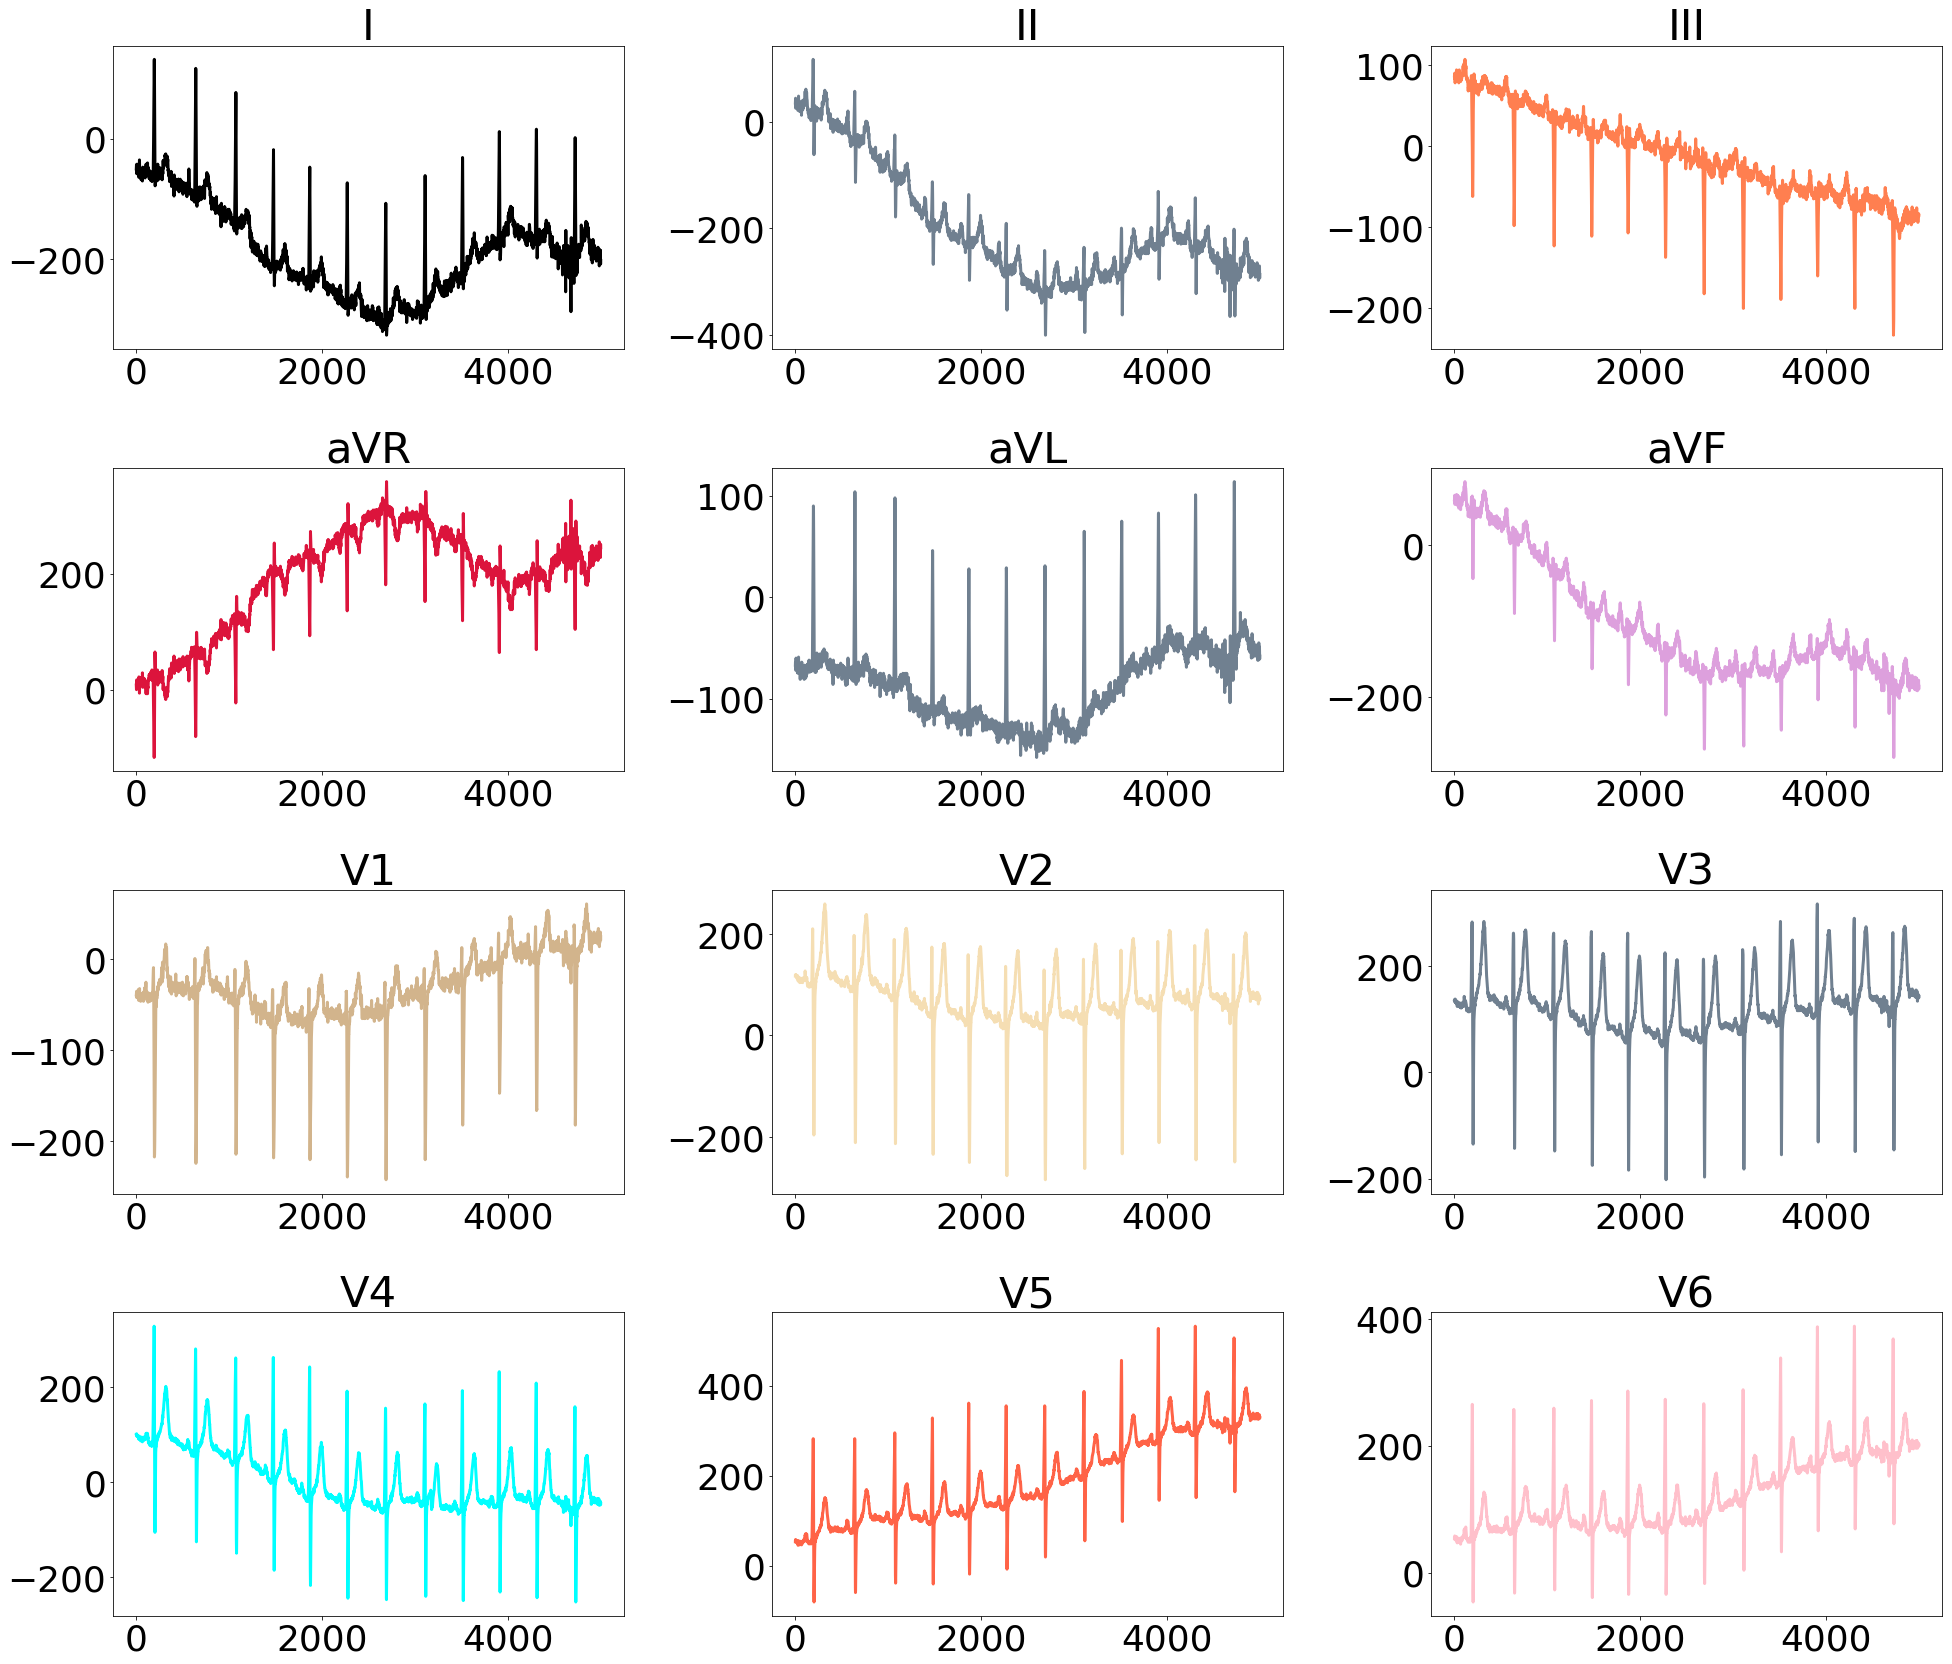

In [3]:
strip_ekgs = {}
ffts = {}
xml_file = '/mnt/disks/data/raw/ecgs/5223300_20205_2_0.xml'

root = et.parse(xml_file).getroot()
for c in root.findall("./StripData/WaveformData"):
    strip_ekgs[c.attrib['lead']] = np.array(list(map(float, c.text.strip().split(','))))
    ffts[c.attrib['lead']] = np.fft.fft(strip_ekgs[c.attrib['lead']])

plot_ecg(strip_ekgs, 'strip')

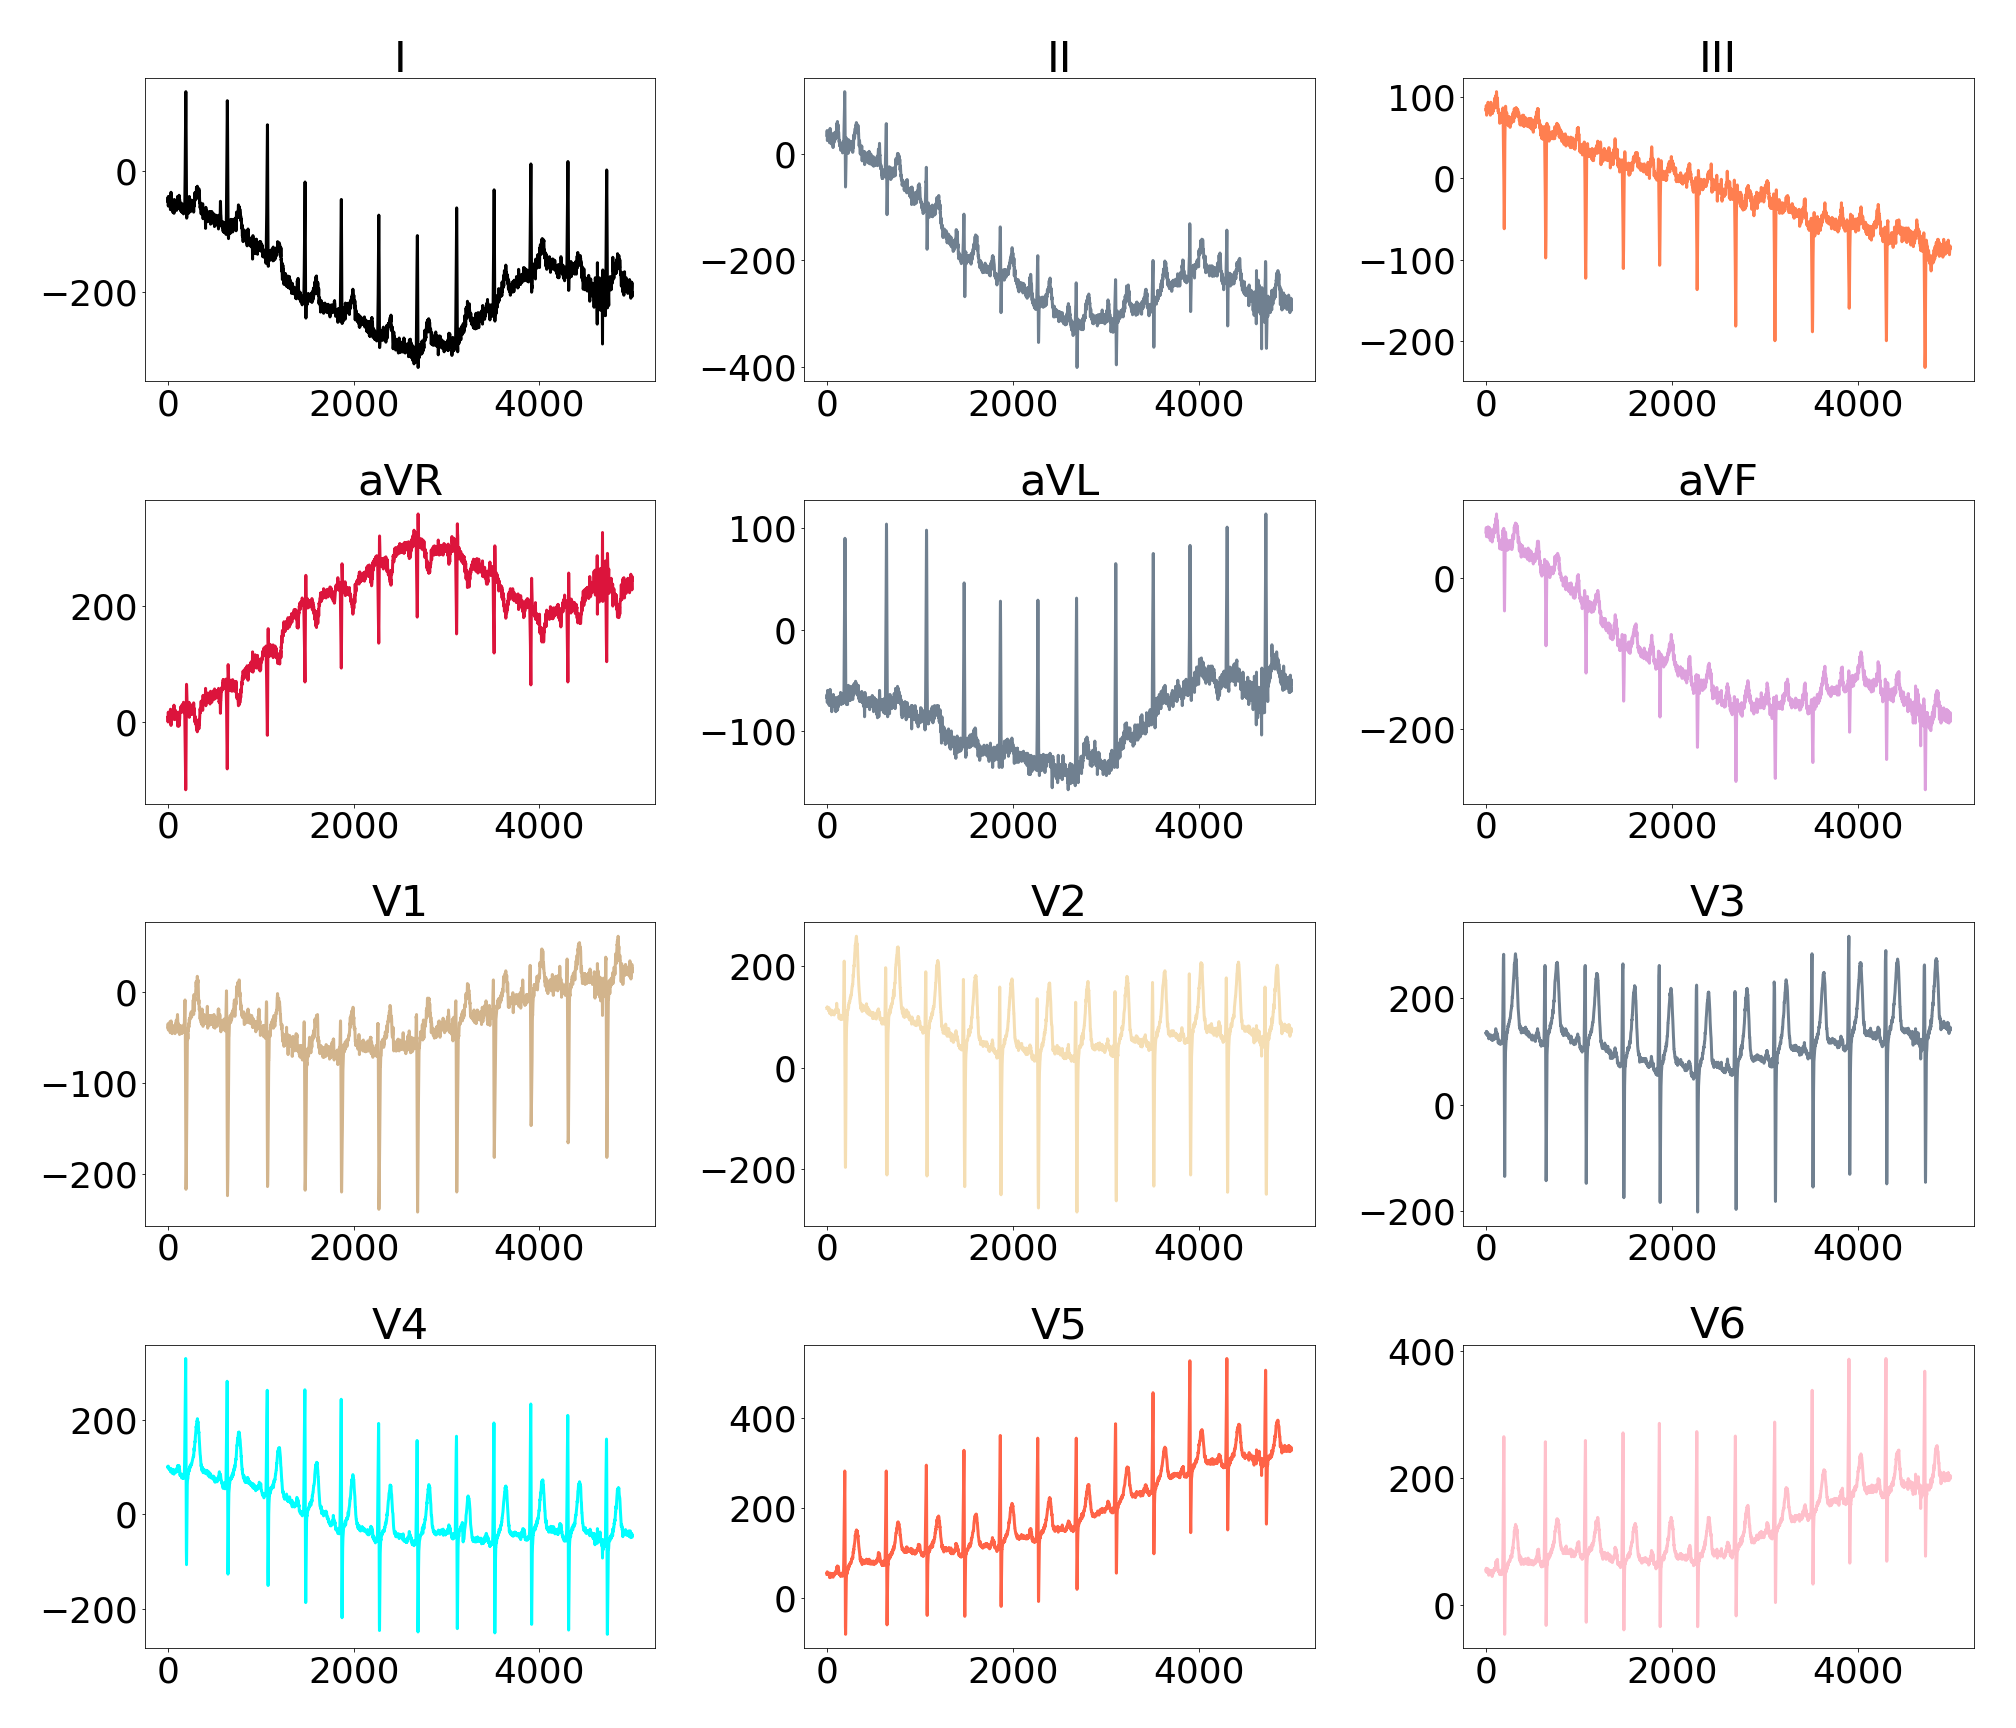

In [4]:
Image('./figures/strip_ecg.png')

In [5]:
for c in root.findall("./RestingECGMeasurements"):
    for child in c:
        print(child.tag, child.text)
        
for d in root.findall("./Interpretation/Diagnosis/DiagnosisText"):
	diagnosis = ''.join(e for e in d.text if e.isalnum() or e == ' ')
	print(diagnosis)

DiagnosisVersion 12SL V21
VentricularRate 73
PQInterval 176
PDuration 90
QRSDuration 86
QTInterval 390
QTCInterval 429
RRInterval 822
PPInterval 820
SokolovLVHIndex None
PAxis 68
RAxis -20
TAxis 40
QTDispersion None
QTDispersionBazett None
QRSNum 12
MeasurementTable 
			
POnset 252
POffset 342
QOnset 428
QOffset 514
TOffset 818
MedianSamples 
			
Normal sinus rhythm
Normal ECG

Arrhythmia results of the fulldisclosure ECG
   QRS Complexes 22


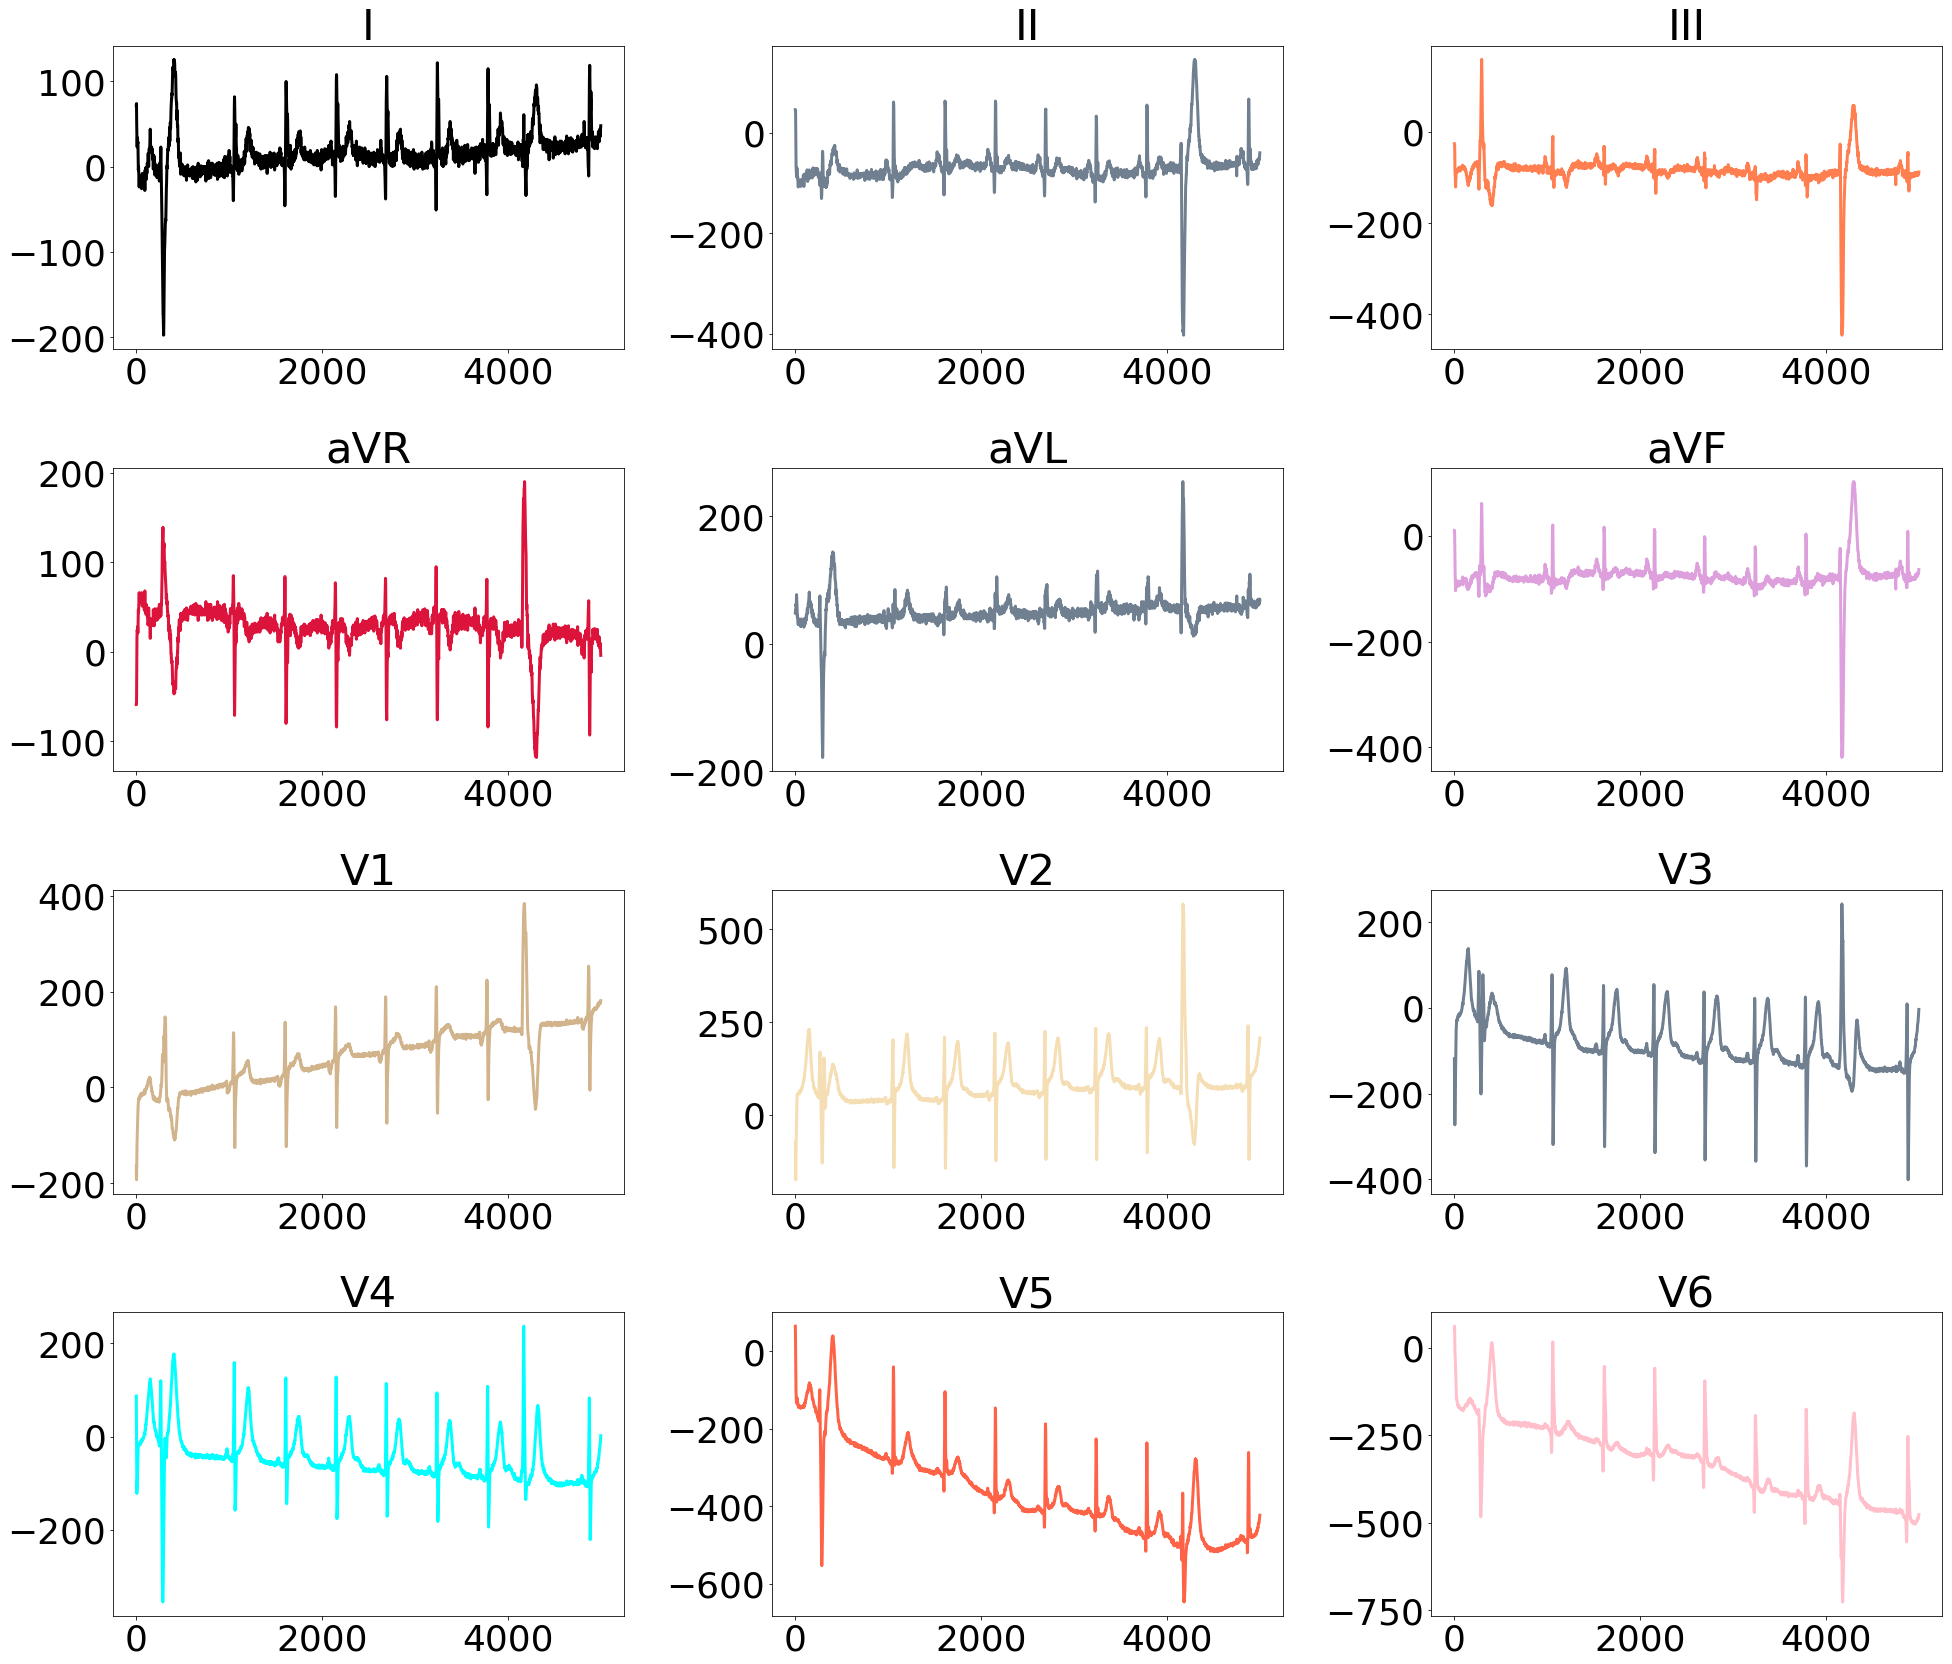

In [6]:
xml_file = '/mnt/disks/data/raw/ecgs/4856206_20205_2_0.xml'

root = et.parse(xml_file).getroot()
for c in root.findall("./StripData/WaveformData"):
	strip_ekgs[c.attrib['lead']] = np.array(list(map(float, c.text.strip().split(','))))

plot_ecg(strip_ekgs, 'strip_bradycardia')

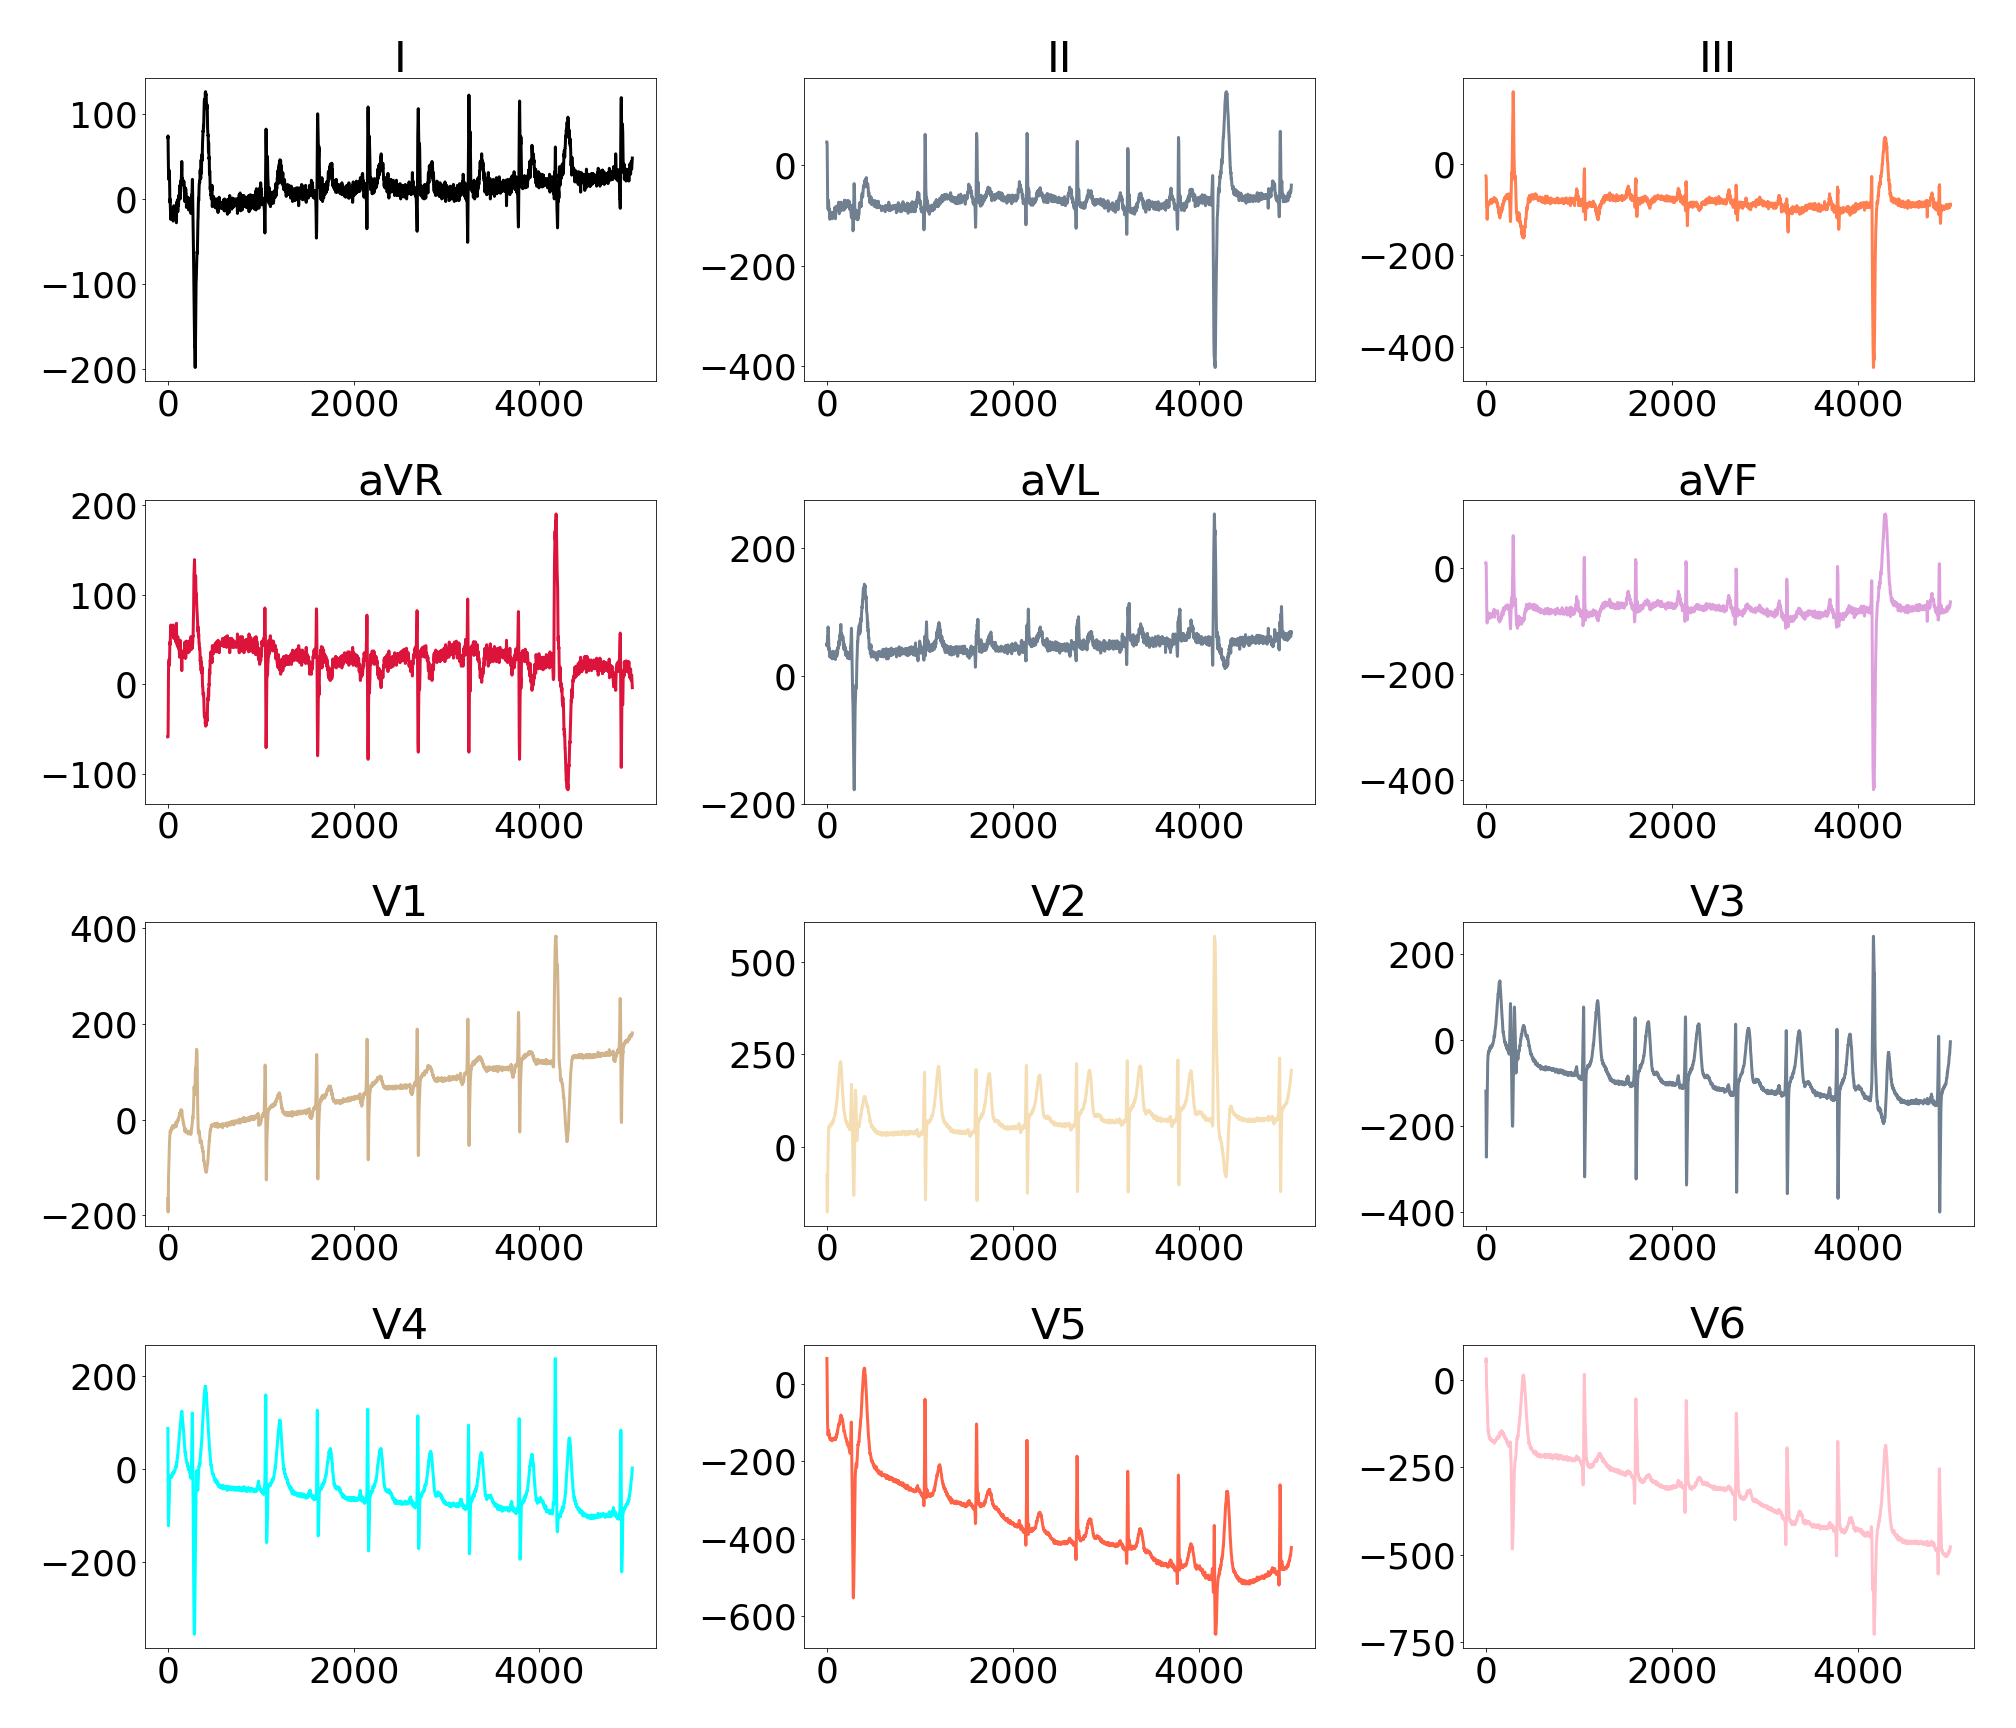

In [7]:
Image('./figures/strip_bradycardia_ecg.png')

In [8]:
root = et.parse(xml_file).getroot()
for d in root.findall("./Interpretation/Diagnosis/DiagnosisText"):
	diagnosis = ''.join(e for e in d.text if e.isalnum() or e == ' ')
	print(diagnosis)

Sinus bradycardia with occasional premature ventricular complexes
Lateral infarct  age undetermined
Possible Inferior infarct  age undetermined
Abnormal ECG

Arrhythmia results of the fulldisclosure ECG
   QRS Complexes 2


In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/ecg-text2/2019-03-30/', 
            '--input_tensors', 'ecg_rest', 
            '--output_tensors', 'ecg_rhythm', 'ecg_normal', 'p-axis', 'p-duration', 
                'p-offset', 'p-onset', 'pp-interval', 'pq-interval', 'q-offset', 'q-onset', 
                'qrs-num', 'qrs-duration', 'r-axis', 'ventricular-rate',
            '--batch_size', '32', 
            '--epochs', '1',  
            '--learning_rate', '0.0001',
            '--model_file', '/mnt/ml4cvd/projects/jamesp/data/models/ecg_regresser.hd5',
            '--training_steps', '20',
            '--inspect_model',
            '--id', 'ecg_regresser']
args = parse_args()
train_multimodal_multitask(args)

In [ ]:
Image('./recipes_output/ecg_regresser/architecture_graph_ecg_regresser.png')

In [ ]:
Image('./recipes_output/ecg_regresser/per_class_roc_ecg_rhythm.png')

In [ ]:
Image('./recipes_output/ecg_regresser/per_class_roc_ecg_normal.png')

In [ ]:
Image('./recipes_output/ecg_regresser/scatter_PPInterval.png')

In [ ]:
Image('./recipes_output/ecg_regresser/scatter_QRSDuration.png')